In [ ]:
using CovidSim

In [239]:
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#73"{CovidSim.var"#scase#72#74"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [1278]:
alldict, env, series = run_a_sim(180,10, showr0=false, 
       dtfilename="../parameters/dec_tree_all_25.csv",
       silent=true,spreadcases=[],
       runcases=[seed_1_6]);
geo = alldict["geo"];

*** seed day 1 locale 10....
Simulation completed for 180 days.


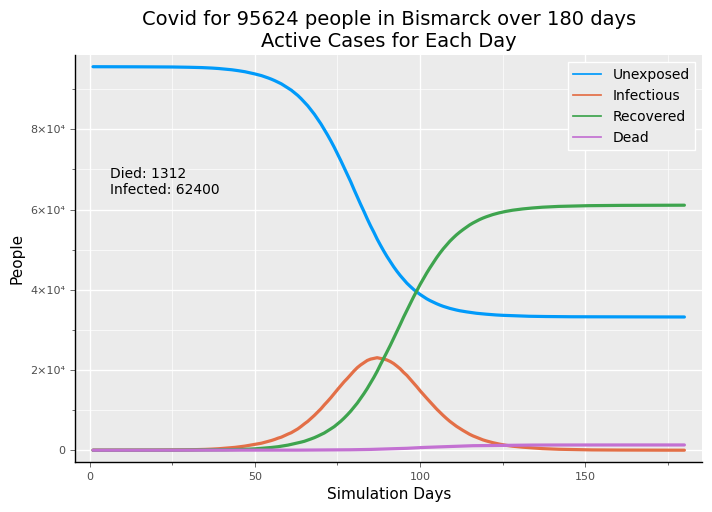

In [1279]:
cumplot(series,10,geo=geo)

In [1303]:
1312/62400

0.021025641025641025

In [1281]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[10][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
deadtbl = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      9  0.007
 "20-40"    67  0.051
 "40-60"   464  0.354
 "60-80"   230  0.175
 "80+"     542  0.413
 "Total"  1312  1.0

In [1282]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
recovals = series[10][:cum][end,[map2series.recovered]...]
pctvals = round.([recovals[i] / recovals[6] for i in 1:length(recovals)], digits=3)
deadtbl = hcat(agelabels, recovals, pctvals)

6×3 Array{Any,2}:
 "0-20"    7151  0.117
 "20-40"  20626  0.338
 "40-60"  18664  0.306
 "60-80"  12545  0.205
 "80+"     2103  0.034
 "Total"  61089  1.0

In [1283]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
unexvals = series[10][:cum][end,[map2series.unexposed]...]
pctvals = round.([unexvals[i] / unexvals[6] for i in 1:length(unexvals)], digits=3)
deadtbl = hcat(agelabels, unexvals, pctvals)

6×3 Array{Any,2}:
 "0-20"   16842  0.507
 "20-40"   5220  0.157
 "40-60"   5255  0.158
 "60-80"   4818  0.145
 "80+"     1083  0.033
 "Total"  33218  1.0

### Worldometers Death Demographics for New York City

<img src=attachment:image.png width="500" height="500">
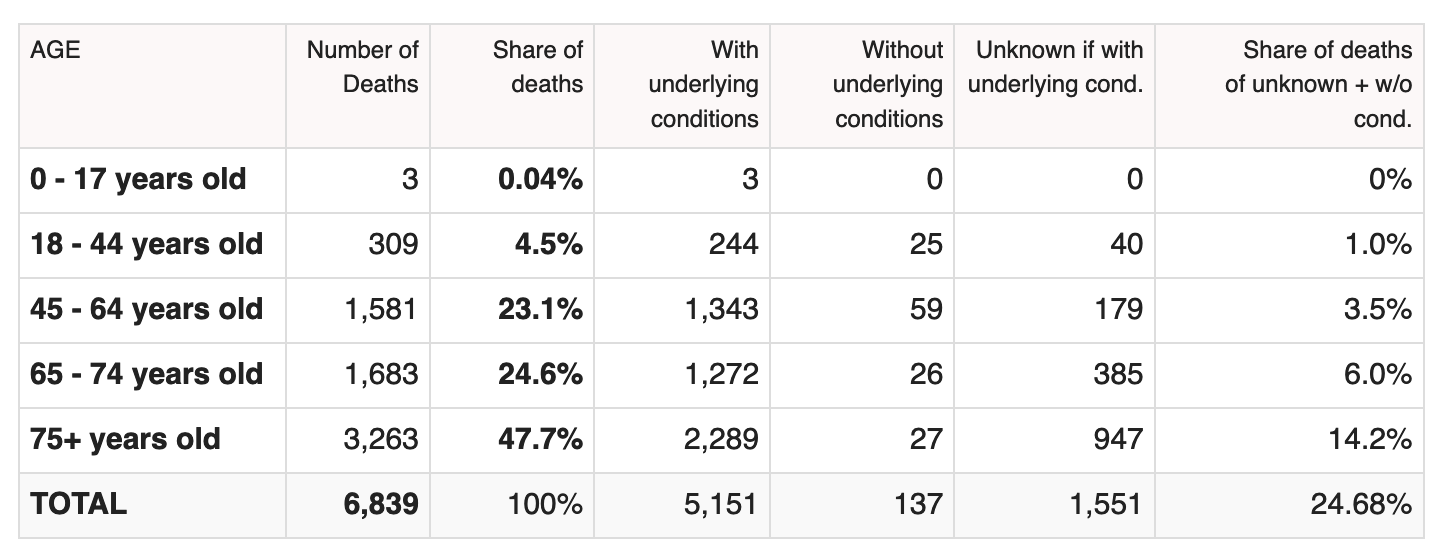

#### CDC Age Demographics for Covid-19 Deaths
<img src=attachment:image.png width="200" height="1000">
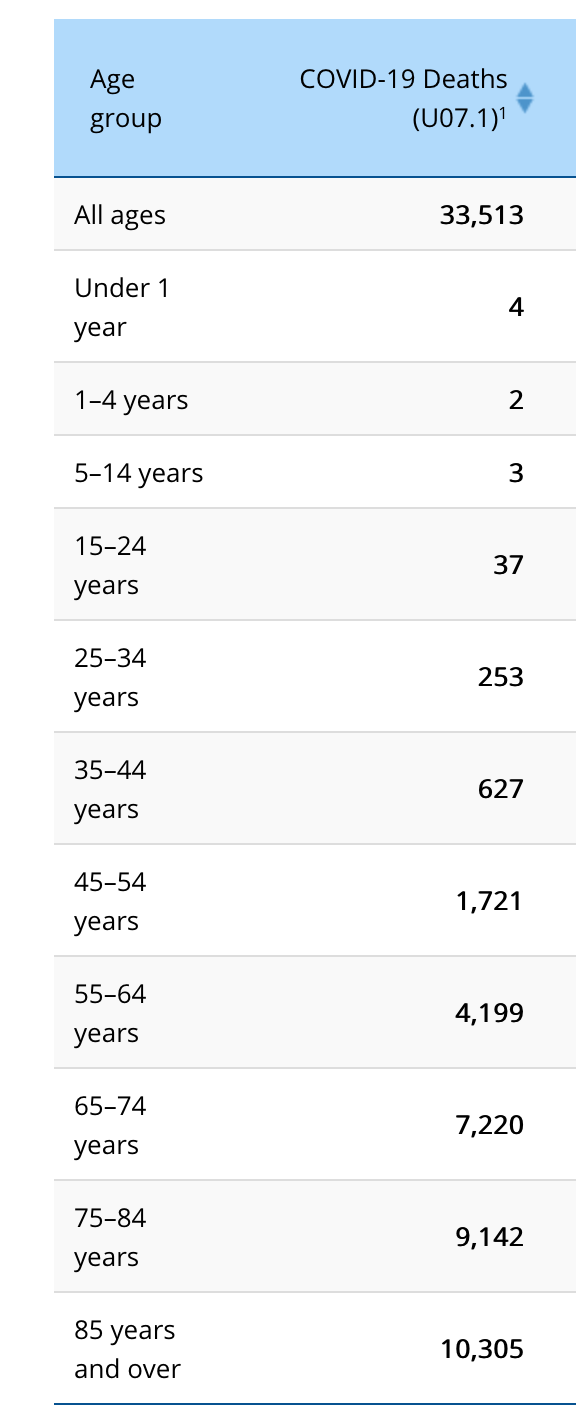

In [1284]:
deadseries = series[10][:cum][:,[map2series.dead]...]
n = size(deadseries,1)

180

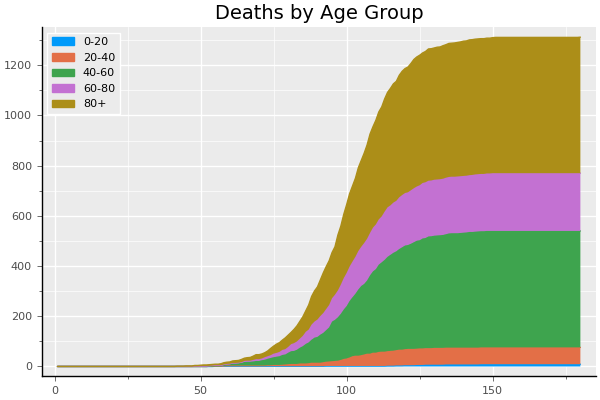

In [1285]:
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
areaplot(1:n, deadseries[:,1:5],labels=ageserieslabels, title="Deaths by Age Group")

In [1309]:
cumhistmx = alldict["dat"]["cumhistmx"]
newhistmx = alldict["dat"]["newhistmx"]
openmx = alldict["dat"]["openmx"];

In [1310]:
summary = (total_infected = series[10][:cum][1, 6] - series[10][:cum][180,6],
total_pop = series[10][:cum][180,6] + series[10][:cum][180,54],
whos_left = series[10][:cum][180,map2series.dead[6]] + series[10][:cum][180,map2series.recovered[6]]
     + series[10][:cum][180,map2series.infectious[6]] + series[10][:cum][180,map2series.unexposed[6]],
end_unexposed = series[10][:cum][180,map2series.unexposed[6]],
end_infected = series[10][:cum][180,map2series.infectious[6]],
end_recovered = series[10][:cum][180,map2series.recovered[6]],
end_dead = series[10][:cum][180,map2series.dead[6]])

(total_infected = 62400, total_pop = 95624, whos_left = 95624, end_unexposed = 33218, end_infected = 5, end_recovered = 61089, end_dead = 1312)

In [1311]:
transeries = DataFrame(transq)
trans = (dead = sum(transeries[:,:dead]), recovered = sum(transeries[:,:recovered]))

(dead = 1312, recovered = 61089)

In [1312]:
err = summary.total_infected - (trans.recovered + trans.dead + summary.end_infected)

-6

In [1313]:
spreadseries = day2df(spreadq)
check_infected = sum(spreadseries[:,:infected])

62400

end_exposed is ok (off by 2 from age rounding and 6 seeds)
total infected is ok; matches check_infected

##### Some random documentation for me

In [1300]:
plotattr()

Specify an attribute type to get a list of supported attributes. Options are Series, Subplot, Plot, Axis


In [1301]:
plotattr(:Subplot)

Defined Subplot attributes are:
annotations, aspect_ratio, background_color_inside, background_color_legend, background_color_subplot, bottom_margin, camera, clims, color_palette, colorbar, colorbar_title, extra_kwargs, fontfamily_subplot, foreground_color_legend, foreground_color_subplot, foreground_color_title, framestyle, left_margin, legend, legendfontcolor, legendfontfamily, legendfonthalign, legendfontrotation, legendfontsize, legendfontvalign, legendtitle, legendtitlefontcolor, legendtitlefontfamily, legendtitlefonthalign, legendtitlefontrotation, legendtitlefontsize, legendtitlefontvalign, margin, projection, right_margin, subplot_index, title, titlefontcolor, titlefontfamily, titlefonthalign, titlefontrotation, titlefontsize, titlefontvalign, titlelocation, top_margin


In [1302]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, match_dimensions, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror
